**Problem Statement:**

You are a Data Scientist in a big firm. You have to develop a deep learning model to perform sentiment analysis on a dataset of tweets related to various candidates.

Data Loading and Preprocessing:

● Load the tweet data from a CSV file.

● Filter out the relevant columns: 'candidate', 'sentiment', and 'text'.

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/twitter/twitter_training.csv')
df.columns = ['ID', 'Brand', 'Sentiment', 'Text']
df = df.astype('string')
df['ID'] = df['ID'].astype('int64')
#df['Text'] = df['Text'].astype(str)

df.tail()


,ID,Brand,Sentiment,Text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Brand      74681 non-null  string
 2   Sentiment  74681 non-null  string
 3   Text       73995 non-null  string
dtypes: int64(1), string(3)
memory usage: 2.3 MB


In [3]:
df['Sentiment'].unique()

<StringArray>
['Positive', 'Neutral', 'Negative', 'Irrelevant']
Length: 4, dtype: string

In [4]:
df.isna().sum()

ID             0
Brand          0
Sentiment      0
Text         686
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

ID           0
Brand        0
Sentiment    0
Text         0
dtype: int64

In [7]:
df['Sentiment'].unique()

<StringArray>
['Positive', 'Neutral', 'Negative', 'Irrelevant']
Length: 4, dtype: string

<Axes: xlabel='Sentiment', ylabel='count'>

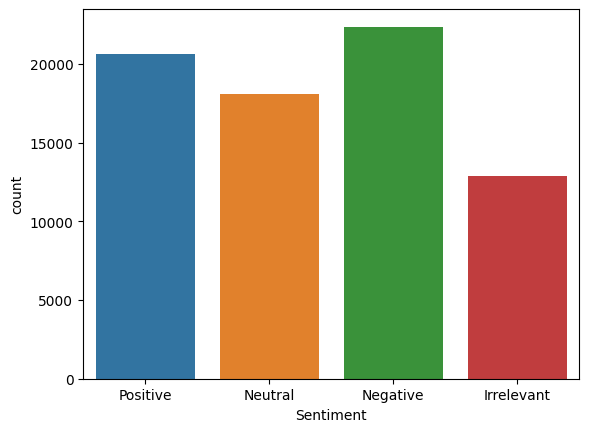

In [8]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='Sentiment', data=df)

● Preprocess the text data by removing stop words, punctuation, converting to lowercase, and other cleaning steps.

In [9]:
df["Text"][2000]

'Congratulations to Borderlands Research Institute for an recent grant in a amount of $80,000 from PCQC. BRI is dedicated to the study for Montezuma quail in the Trans-Pecos region in order as better understand its population density.'

In [10]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Define preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Get stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(filtered_tokens)  # Join tokens back into a string

# Apply preprocessing to the Text column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)


In [11]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.20,random_state=123)

In [12]:
df["Cleaned_Text"][2000]

'congratulations borderlands research institute recent grant amount 80000 pcqc bri dedicated study montezuma quail transpecos region order better understand population density'

In [13]:
df.tail()

,ID,Brand,Sentiment,Text,Cleaned_Text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like 6 years be...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 years behind n...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac 6 years behind ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like 6 years be...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,like windows partition mac like 6 years behind...


**Text Vectorization:**

Convert the preprocessed text data into numerical format using tokenization and padding, so that it can be fed into a deep learning model.

In [14]:
import pandas as pd
import numpy as np


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

#Tokenization: Use the Keras Tokenizer to convert text into sequences of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Cleaned_Text'])  # Fit the tokenizer on the cleaned text

vocab_length=len(tokenizer.word_index) + 1
print(f"Vocabulary Length: {vocab_length}")

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Cleaned_Text']), maxlen=100)
print(X_train)

X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['Cleaned_Text']), maxlen=100)
print(X_test)


y_train=train_df['Sentiment']

y_test=test_df['Sentiment']
print(y_train.head())
print(y_test.head())



Vocabulary Length: 37757
[[    0     0     0 ...  4501  7849    70]
 [    0     0     0 ...     2   106 16082]
 [    0     0     0 ...  2408   484   794]
 ...
 [    0     0     0 ...  6818  2088  1555]
 [    0     0     0 ...   203   203   203]
 [    0     0     0 ...   242 37756    88]]
[[    0     0     0 ...  3245  1113    45]
 [    0     0     0 ...   320  2698  1823]
 [    0     0     0 ...  3368   147   436]
 ...
 [    0     0     0 ...  1771   568 28520]
 [    0     0     0 ...  6839 14874  2141]
 [    0     0     0 ...     2  5477 22427]]
7063     Negative
33335    Positive
47158    Positive
2414     Negative
70874    Positive
Name: Sentiment, dtype: string
53967      Negative
63474      Negative
21052    Irrelevant
45464      Negative
60704    Irrelevant
Name: Sentiment, dtype: string


In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_train = to_categorical(y_train_encoded, num_classes=4)

y_test_encoded = le.fit_transform(y_test)
y_test = to_categorical(y_test_encoded, num_classes=4)

**Model Development:**

Develop a deep learning model using TensorFlow and Keras.

The model includes an Embedding layer, a SpatialDropout1D layer to prevent overfitting, an LSTM layer for sequence data processing, and a Dense layer for output. 

It aims to classify the sentiment of each tweet into one of the three categories.

In [16]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [17]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix.shape

(37757, 100)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense,Bidirectional,Dropout, GRU,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix],trainable=False)

model.add(embedding_layer)
model.add(SpatialDropout1D(0.5))  # Reduced dropout to prevent underfitting
model.add(LSTM(128))  # Stacked LSTM layers for better learning: 
#model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     3,775,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,775,700 (14.40 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,775,700 (14.40 MB)

**Model Training and Evaluation:**

● Train the model on the processed text data, using categorical cross-entropy as the loss function, and accuracy as the evaluation metric.

● Use a validation split to evaluate the model's performance and prevent overfitting.

In [19]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (59196, 100)
y_train.shape: (59196, 4)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.2,callbacks=[early_stopping,lr_scheduler])


Epoch 1/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4171 - loss: 1.2879 - val_accuracy: 0.5095 - val_loss: 1.1671 - learning_rate: 0.0010
Epoch 2/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4764 - loss: 1.2019 - val_accuracy: 0.5334 - val_loss: 1.1206 - learning_rate: 0.0010
Epoch 3/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4991 - loss: 1.1609 - val_accuracy: 0.5471 - val_loss: 1.0760 - learning_rate: 0.0010
Epoch 4/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5201 - loss: 1.1264 - val_accuracy: 0.5531 - val_loss: 1.0643 - learning_rate: 0.0010
Epoch 5/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5316 - loss: 1.0995 - val_accuracy: 0.5707 - val_loss: 1.0276 - learning_rate: 0.0010
Epoch 6/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5475 - loss: 1.0709 - val_accuracy: 0.5756 - val_loss: 1.0117 - learning_rate: 0.0010
Epoch 7/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5558 - l

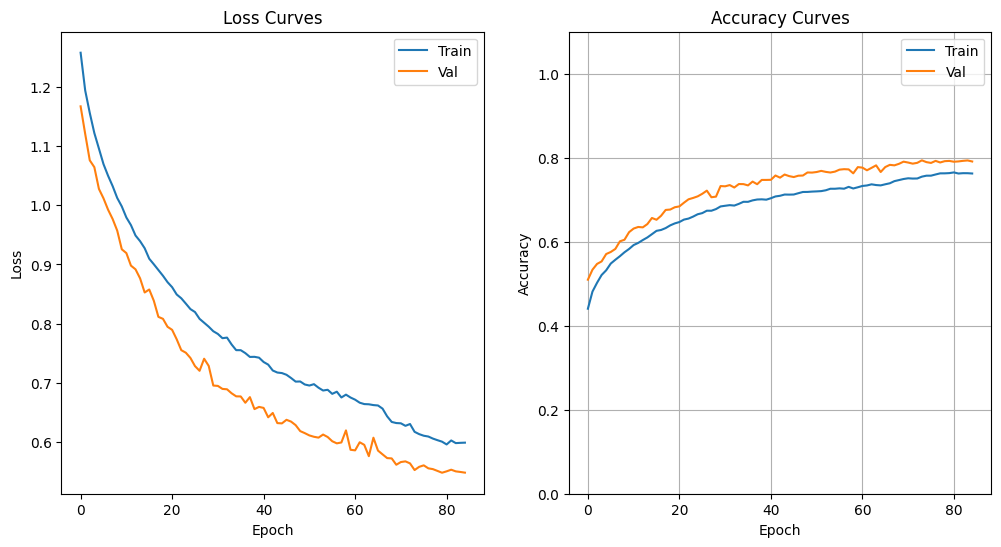

In [21]:
import matplotlib.pyplot as plt
#Track accuracy
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize=(12, 6))
# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(["Train", "Val"])


# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.title("Accuracy Curves")
plt.legend(["Train", "Val"])


plt.grid()
plt.show()


In [25]:
# Predictions on the Test Set
model.evaluate(X_test, y_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7926 - loss: 0.5568


[0.5583873391151428, 0.7901209592819214]

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [32]:
scores = model.predict(X_test, verbose=1, batch_size=1024)
y_pred=np.where(scores>0.5,1,0)
y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [33]:

print(accuracy_score(y_pred,y_test))


0.7415365903101561


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73      2556
           1       0.85      0.80      0.83      4507
           2       0.87      0.68      0.76      3651
           3       0.82      0.79      0.81      4085

   micro avg       0.85      0.74      0.79     14799
   macro avg       0.85      0.73      0.78     14799
weighted avg       0.85      0.74      0.79     14799
 samples avg       0.74      0.74      0.74     14799



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
